In [249]:
# Import libraries 
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Pretty display for notebooks
%matplotlib inline

# read data

data = pd.read_csv('C:/Users/amanu/Desktop/allthingsIFE/Breast_cancer_wisconsin_data_yonas.csv')

In [250]:
# Print first 10 rows of data
data[:10]

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [251]:
# change classes 2 and 4 to 0 benign and 1 malignant respectively

data.loc[data['Class'] == 2, 'Class'] = 0 #'benign'
data.loc[data['Class'] == 4, 'Class'] = 1 #'malignant'
#data[ :10]

In [252]:
#count and impute missing values in data
data.isnull().sum()


Samplecodenumber             0
ClumpThickness               0
UniformityofCellSize         0
UniformityofCellShape        0
MarginalAdhesion             0
SingleEpithelialCellSize     0
BareNuclei                  16
BlandChromatin               0
NormalNucleoli               0
Mitoses                      0
Class                        0
dtype: int64

In [253]:
#impute missing data with mean
data.fillna(data.mean(), inplace=True)

In [254]:
#count after imputed missing values in data 
data.isnull().sum()

Samplecodenumber            0
ClumpThickness              0
UniformityofCellSize        0
UniformityofCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

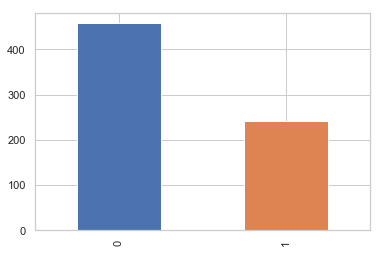

In [255]:
# Importing matplotlib
import matplotlib.pyplot as plt

#how many benign vs malignant

data["Class"].value_counts().plot.bar()

plt.show()
    

In [162]:
#The bar graph shows that the data is uneven, with benign [2] outcomes almost twice as much as malignant outcomes [4].


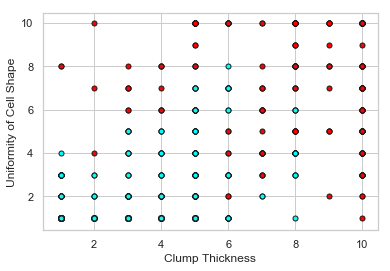

In [256]:
# Function to plot
def plot_points(data):
    X = np.array(data[["ClumpThickness", "UniformityofCellShape"]])
    y = np.array(data["Class"])
    benign = X[np.argwhere(y== 0)]
    malignant = X[np.argwhere(y== 1)]
    plt.scatter([s[0][0] for s in malignant], [s[0][1] for s in malignant], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in benign], [s[0][1] for s in benign], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Clump Thickness')
    plt.ylabel('Uniformity of Cell Shape')
    
# Plotting data points
plot_points(data)
plt.show()

In [33]:
#Roughly, it looks like high values for uniformity of cell shape and clump thickness tend to be associated with malignant cells. The data
#does not appear clearly separable however.

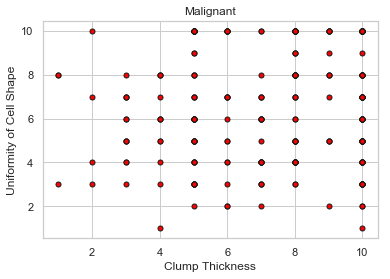

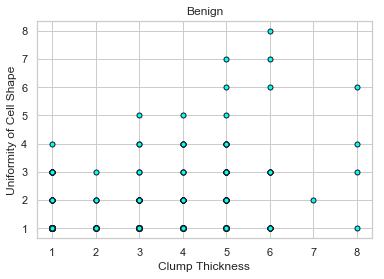

In [257]:
# Separating the ranks
data_malignant = data[data["Class"]==1]
data_benign = data[data["Class"]==0]

# Plotting the graphs
plot_points(data_malignant)
plt.title("Malignant")
plt.show()
plot_points(data_benign)
plt.title("Benign")
plt.show()

In [35]:
## looks like values for the plotted variables [clump thickness and uniformity of cell shape] are lower for benign cells
#and higher for malignant cells

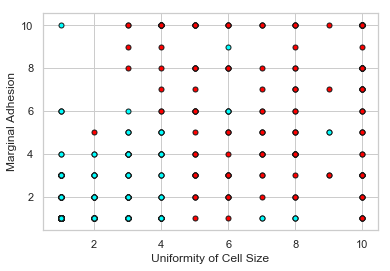

In [262]:
# Function to plot
def plot_points(data):
    X = np.array(data[["UniformityofCellSize", "MarginalAdhesion"]])
    y = np.array(data["Class"])
    benign = X[np.argwhere(y==0)]
    malignant = X[np.argwhere(y==1)]
    plt.scatter([s[0][0] for s in malignant], [s[0][1] for s in malignant], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in benign], [s[0][1] for s in benign], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Uniformity of Cell Size')
    plt.ylabel('Marginal Adhesion')
    
# Plotting data points
plot_points(data)
plt.show()

In [261]:
#Roughly, it looks like high values for uniformity of cell Size and Marginal Adhesion tend to be associated with malignant cells. The data
#does not appear clearly separable however.


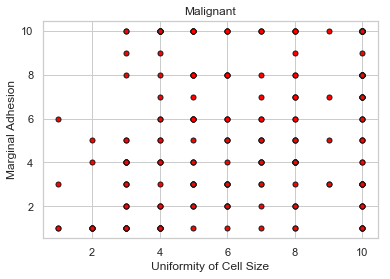

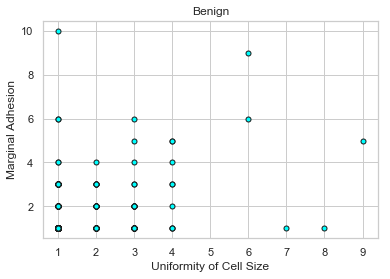

In [263]:
# Separating the ranks
data_malignant = data[data["Class"]==1]
data_benign = data[data["Class"]==0]

# Plotting the graphs
plot_points(data_malignant)
plt.title("Malignant")
plt.show()
plot_points(data_benign)
plt.title("Benign")
plt.show()

In [39]:
## looks like values for the plotted variables [uniformity of cells and Marginal Adhession] are generally lower for benign cells
#and higher for malignant cells

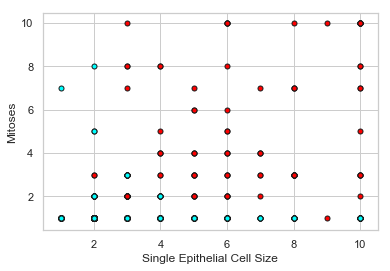

In [264]:
# Function to plot
def plot_points(data):
    X = np.array(data[["SingleEpithelialCellSize", "Mitoses"]])
    y = np.array(data["Class"])
    benign = X[np.argwhere(y==0)]
    malignant = X[np.argwhere(y==1)]
    plt.scatter([s[0][0] for s in malignant], [s[0][1] for s in malignant], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in benign], [s[0][1] for s in benign], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Single Epithelial Cell Size')
    plt.ylabel('Mitoses')
    
# Plotting data points
plot_points(data)
plt.show()



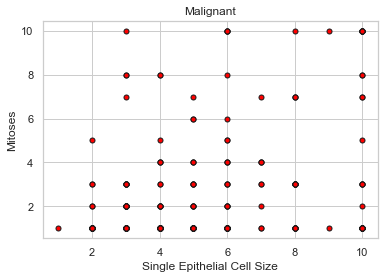

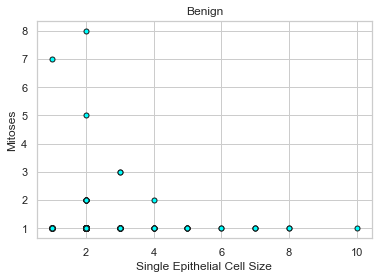

In [265]:
# Separating the ranks
data_malignant = data[data["Class"]==1]
data_benign = data[data["Class"]==0]

# Plotting the graphs
plot_points(data_malignant)
plt.title("Malignant")
plt.show()
plot_points(data_benign)
plt.title("Benign")
plt.show()

In [66]:
# In general there appears some correlation between variable values and the outcome. Next I will perform PCA to identify the 
#most important variables in explaining the variance in the outcome.

In [266]:
# scale data
data['ClumpThickness'] = data['ClumpThickness']/10
data['UniformityofCellSize'] = data['UniformityofCellSize']/10
data['UniformityofCellShape'] = data['UniformityofCellShape']/10
data['MarginalAdhesion'] = data['MarginalAdhesion']/10
data['SingleEpithelialCellSize'] = data['SingleEpithelialCellSize']/10
data['BareNuclei'] = data['BareNuclei']/10
data['BlandChromatin'] = data['BlandChromatin']/10
data['NormalNucleoli'] = data['NormalNucleoli']/10
data['Mitoses'] = data['Mitoses']/10

data[:10]


,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,0.5,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1,0
1,1002945,0.5,0.4,0.4,0.5,0.7,1.0,0.3,0.2,0.1,0
2,1015425,0.3,0.1,0.1,0.1,0.2,0.2,0.3,0.1,0.1,0
3,1016277,0.6,0.8,0.8,0.1,0.3,0.4,0.3,0.7,0.1,0
4,1017023,0.4,0.1,0.1,0.3,0.2,0.1,0.3,0.1,0.1,0
5,1017122,0.8,1.0,1.0,0.8,0.7,1.0,0.9,0.7,0.1,1
6,1018099,0.1,0.1,0.1,0.1,0.2,1.0,0.3,0.1,0.1,0
7,1018561,0.2,0.1,0.2,0.1,0.2,0.1,0.3,0.1,0.1,0
8,1033078,0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.5,0
9,1033078,0.4,0.2,0.1,0.1,0.2,0.1,0.2,0.1,0.1,0


In [315]:
## Split the data into features and target label
Class_raw = data['Class']
features_raw = data.drop('Class', axis =1)
#features_raw = data.drop('Samplecodenumber', axis = 1)

#Encode the 'income_raw' data to 0 benign and 1 malignant

Class_raw= pd.Categorical(Class_raw)
Class = pd.factorize (Class_raw == 0)[0]

features_raw[ :10]

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
0,1000025,0.5,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1
1,1002945,0.5,0.4,0.4,0.5,0.7,1.0,0.3,0.2,0.1
2,1015425,0.3,0.1,0.1,0.1,0.2,0.2,0.3,0.1,0.1
3,1016277,0.6,0.8,0.8,0.1,0.3,0.4,0.3,0.7,0.1
4,1017023,0.4,0.1,0.1,0.3,0.2,0.1,0.3,0.1,0.1
5,1017122,0.8,1.0,1.0,0.8,0.7,1.0,0.9,0.7,0.1
6,1018099,0.1,0.1,0.1,0.1,0.2,1.0,0.3,0.1,0.1
7,1018561,0.2,0.1,0.2,0.1,0.2,0.1,0.3,0.1,0.1
8,1033078,0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.5
9,1033078,0.4,0.2,0.1,0.1,0.2,0.1,0.2,0.1,0.1


In [318]:
features_raw = data.drop('Class', axis =1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_raw)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [319]:
#concat pca to output
finalDf = pd.concat([principalDf, data[['Class']]], axis = 1)



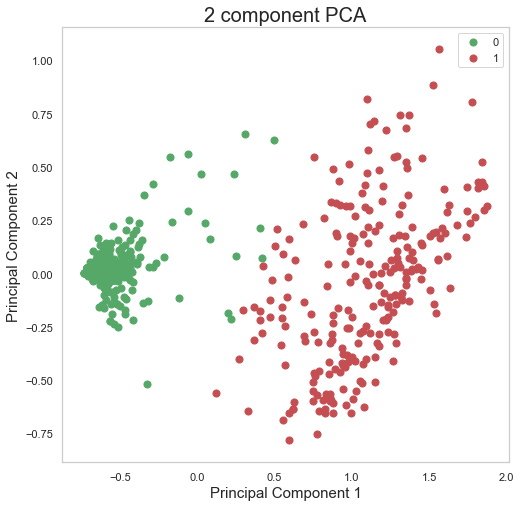

In [292]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



In [320]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    Class, 
                                                    test_size = 0.4, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
X_train[:10]

Training set has 419 samples.
Testing set has 280 samples.


,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
213,1221863,1.0,1.0,1.0,1.0,0.7,1.0,0.7,1.0,0.4
425,1258549,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.1
546,1222464,0.6,1.0,1.0,1.0,0.4,1.0,0.7,1.0,0.1
246,144888,0.8,1.0,1.0,0.8,0.5,1.0,0.7,0.8,0.1
415,1239232,0.3,0.3,0.2,0.6,0.3,0.3,0.3,0.5,0.1
366,95719,0.6,1.0,1.0,1.0,0.8,1.0,0.7,1.0,0.7
125,1176406,0.1,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1
395,1168278,0.3,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1
497,1182404,0.4,0.2,0.1,0.1,0.2,0.1,0.1,0.1,0.1
358,866325,0.8,1.0,0.5,0.3,0.8,0.4,0.4,1.0,0.3


In [307]:
 #Recursive Feature Elimination- repeatedly construct a model and choose either -
#the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 9)
rfe = rfe.fit(X_train, y_train.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True False  True]
[1 1 1 1 1 1 1 1 2 1]


C:\Users\amanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [308]:
#rfe SELECTING all but the variable Mitoses

In [322]:
cols=['ClumpThickness', 'UniformityofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 
      'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses'] 
X=X_train[cols]
logit_model=sm.Logit(y_train,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.395684
         Iterations 8
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.380     
Dependent Variable:    y                  AIC:                349.5829  
Date:                  2019-03-26 11:05   BIC:                385.9237  
No. Observations:      419                Log-Likelihood:     -165.79   
Df Model:              8                  LL-Null:            -267.61   
Df Residuals:          410                LLR p-value:        1.0895e-39
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
ClumpThickness           -2.8508   0.7079 -4.0273 0

In [324]:
#The p-values for the variables UniformityofCellShape and MarginalAdhesion are greater than 0.05, therefore, we will remove them.

In [325]:
cols=['ClumpThickness', 'UniformityofCellSize', 'SingleEpithelialCellSize', 
      'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses'] 
X=X_train[cols]
logit_model=sm.Logit(y_train,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.399657
         Iterations 8
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.374     
Dependent Variable:    y                  AIC:                348.9130  
Date:                  2019-03-26 11:08   BIC:                377.1781  
No. Observations:      419                Log-Likelihood:     -167.46   
Df Model:              6                  LL-Null:            -267.61   
Df Residuals:          412                LLR p-value:        1.6260e-40
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
ClumpThickness           -2.7303   0.6903 -3.9555 0

In [337]:
#logistic regression model fitting

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X= data[cols]
y=data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\amanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [338]:
#Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [339]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[172   8]
 [  6  94]]


In [340]:
#Compute precision, recall, F-measure and support
#Precision = the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       180
           1       0.92      0.94      0.93       100

   micro avg       0.95      0.95      0.95       280
   macro avg       0.94      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280



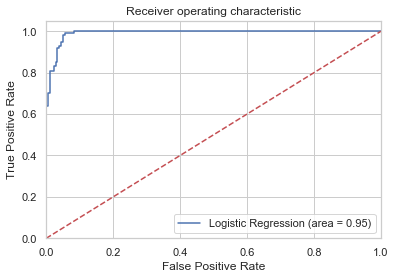

In [341]:
#ROC Curve- The dotted line represents the ROC curve 
#of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
##The model has done unrealistically well in its prediction of the test data- some of which may owe to the unbalanced 
#nature of the output variable which was not dealt with.